<a href="https://colab.research.google.com/github/yassinelamouchi/Analyse-de-donnees-sur-les-maladies-cardiaques/blob/main/ACP_CAH_K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
x=pd.read_csv('/content/bdoriginal.csv')

In [2]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope ca thal  num  
0        3  0    6    0  
1        2  3    3    2  
2        

In [3]:
esp = x.groupby('sex')
print(esp[['age']].describe())

       age                                                    
     count       mean       std   min   25%   50%    75%   max
sex                                                           
0     97.0  55.721649  9.370546  34.0  50.0  57.0  63.00  76.0
1    206.0  53.834951  8.836838  29.0  47.0  54.5  59.75  77.0


In [4]:
import matplotlib.pyplot as plt

identify outliers

<Axes: >

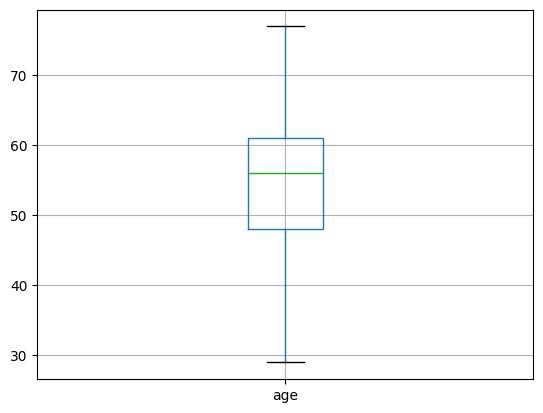

In [5]:
x.boxplot(column='age')

<Axes: >

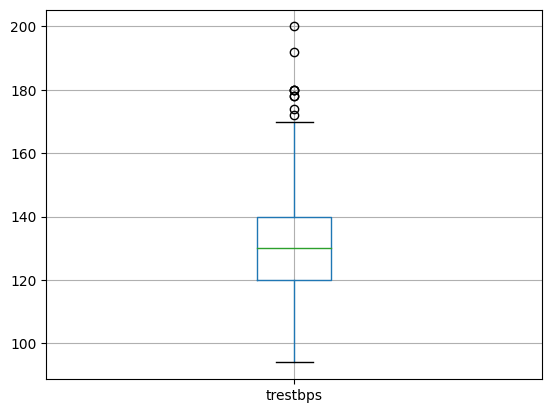

In [6]:
x.boxplot(column='trestbps')

<Axes: >

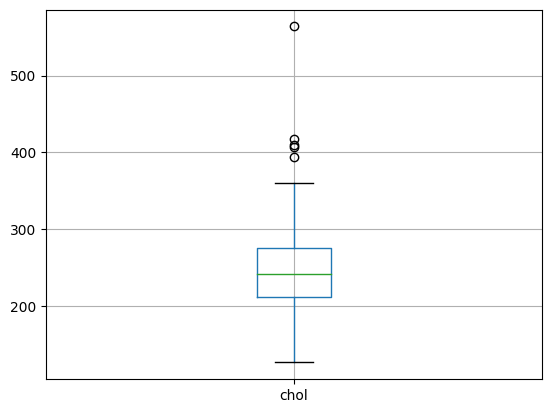

In [7]:
x.boxplot(column='chol')

<Axes: >

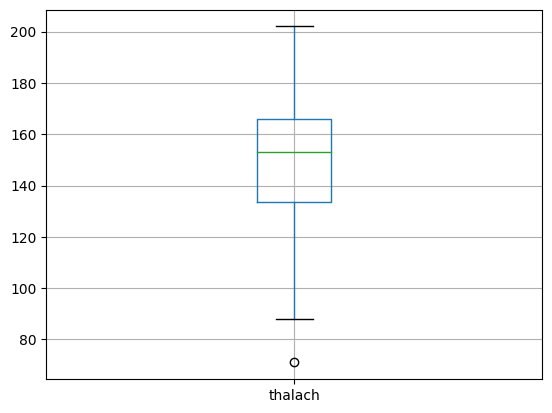

In [8]:
x.boxplot(column='thalach')

<Axes: >

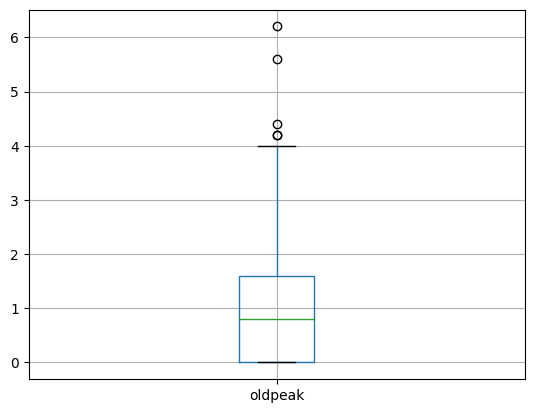

In [9]:
x.boxplot(column='oldpeak')

Calculate correlation matrix

In [25]:
import numpy as np
non_numeric_columns = x.select_dtypes(exclude=[np.number]).columns
if not non_numeric_columns.empty:
    x[non_numeric_columns] = x[non_numeric_columns].apply(pd.to_numeric, errors='coerce')
    x = x.dropna(axis=1)
corr = x.corr()
print(corr)


               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.061914  0.098931  0.292460  0.166457  0.119911   
sex      -0.061914  1.000000  0.050959 -0.004654 -0.127941  0.059518   
cp        0.098931  0.050959  1.000000 -0.064046  0.054892 -0.065580   
trestbps  0.292460 -0.004654 -0.064046  1.000000  0.126390  0.127722   
chol      0.166457 -0.127941  0.054892  0.126390  1.000000  0.013877   
fbs       0.119911  0.059518 -0.065580  0.127722  0.013877  1.000000   
restecg   0.143977  0.060945  0.084110  0.158564  0.123700  0.068809   
thalach  -0.410591 -0.058159 -0.330965 -0.072819 -0.013934 -0.024462   
exang     0.097351  0.183072  0.370101 -0.001276  0.070748 -0.023161   
oldpeak   0.199920  0.166299  0.192125  0.141301 -0.023374  0.019142   
slope     0.144333  0.060060  0.135373  0.080870 -0.049958  0.057008   
ca        0.387391  0.131930  0.220829  0.097997  0.112469  0.164456   
thal      0.122961  0.416042  0.288630  0.100143 -0.019735  0.04

Calculer la matrice de corrélation

In [26]:
import pandas as pd
x = pd.read_csv('/content/bd.csv')
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
selected_data = x[selected_columns]
correlation_matrix = selected_data.corr()
print(correlation_matrix)

               age  trestbps      chol   thalach   oldpeak
age       1.000000  0.292460  0.166457 -0.410591  0.199920
trestbps  0.292460  1.000000  0.126390 -0.072819  0.141301
chol      0.166457  0.126390  1.000000 -0.013934 -0.023374
thalach  -0.410591 -0.072819 -0.013934  1.000000 -0.347443
oldpeak   0.199920  0.141301 -0.023374 -0.347443  1.000000


les valeurs propres de manière décroissante et leur pourcentage de variance expliquée et la variance expliquée cumulée associée

In [27]:
import pandas as pd
import numpy as np

x = pd.read_csv('/content/bd.csv')

eigenvalues = np.linalg.eigvals(correlation_matrix)
eigenvalues_sorted = sorted(eigenvalues, reverse=True)
total_variance = sum(eigenvalues)
explained_variance_percentages = [(eigval / total_variance) * 100 for eigval in eigenvalues_sorted]
cumulative_variance_percentages = np.cumsum(explained_variance_percentages)

print("Valeurs propres des variables sélectionnées (ordonnées de la plus grande à la plus petite) :")
for i, (eigenvalue, explained_variance_percentage, cumulative_variance_percentage) in enumerate(zip(eigenvalues_sorted, explained_variance_percentages, cumulative_variance_percentages), start=1):
    print(f"Valeur propre {i}: {eigenvalue}, Variance expliquée: {explained_variance_percentage:.2f}%, Variance expliquée cumulée: {cumulative_variance_percentage:.2f}%")


Valeurs propres des variables sélectionnées (ordonnées de la plus grande à la plus petite) :
Valeur propre 1: 1.7828027332897218, Variance expliquée: 35.66%, Variance expliquée cumulée: 35.66%
Valeur propre 2: 1.1170674556627607, Variance expliquée: 22.34%, Variance expliquée cumulée: 58.00%
Valeur propre 3: 0.8622411656120532, Variance expliquée: 17.24%, Variance expliquée cumulée: 75.24%
Valeur propre 4: 0.7476265433362063, Variance expliquée: 14.95%, Variance expliquée cumulée: 90.19%
Valeur propre 5: 0.4902621020992572, Variance expliquée: 9.81%, Variance expliquée cumulée: 100.00%


In [14]:
import pandas as pd

# Lire les données à partir du fichier CSV
data = pd.read_csv('/content/bd.csv')

# Compter le nombre d'individus ayant une valeur de 0 pour la variable "sex"
count_zero_sex = ((data['num'] == 1) ).sum()

# Afficher le nombre d'individus ayant une valeur de 0 pour la variable "sex"
print("Nombre d'individus ayant une valeur de 1 pour la variable 'num':", count_zero_sex)


Nombre d'individus ayant une valeur de 1 pour la variable 'num': 154


In [15]:
import pandas as pd

# Lire les données à partir du fichier CSV
data = pd.read_csv('/content/bd.csv')

# Obtenir l'âge maximum
age_max = data['age'].max()

# Obtenir l'âge minimum
age_min = data['age'].min()

# Afficher l'âge maximum et minimum
print("Âge maximum:", age_max)
print("Âge minimum:", age_min)


Âge maximum: 77
Âge minimum: 29


In [16]:
import pandas as pd

# Lire les données à partir du fichier CSV
data = pd.read_csv('/content/bd.csv')

# Compter le nombre d'individus ayant une valeur de 0 pour la variable "sex"
count_zero_sex = ((data['sex'] == 0) ).sum()

# Afficher le nombre d'individus ayant une valeur de 0 pour la variable "sex"
print("Nombre d'individus ayant une valeur de 0 pour la variable 'sex':", count_zero_sex)


Nombre d'individus ayant une valeur de 0 pour la variable 'sex': 85


éboulis des valeurs propres

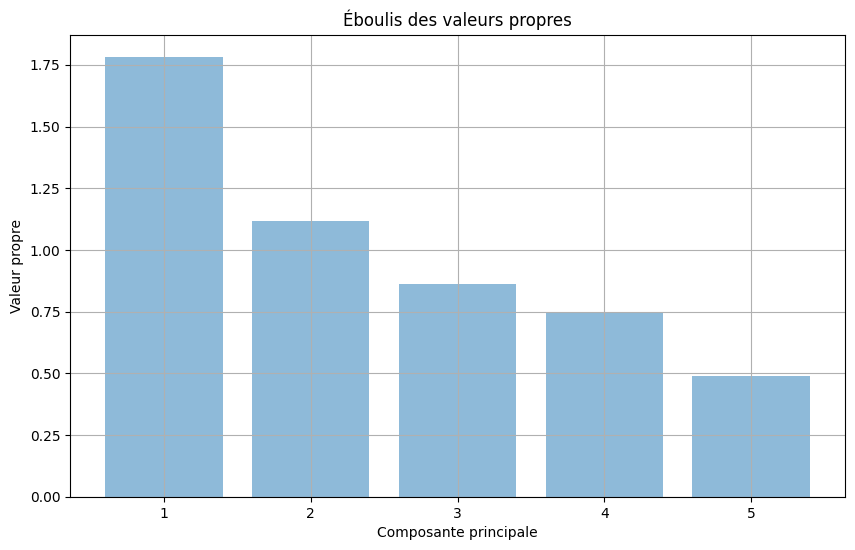

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lire les données à partir du fichier CSV
x = pd.read_csv('/content/bd.csv')

# Sélectionner uniquement les colonnes spécifiées
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
selected_data = x[selected_columns]

# Calculer la matrice de corrélation
correlation_matrix = selected_data.corr()

# Décomposer la matrice de corrélation en valeurs propres
eigenvalues = np.linalg.eigvals(correlation_matrix)

# Trier les valeurs propres de manière décroissante
eigenvalues_sorted = sorted(eigenvalues, reverse=True)

# Créer un éboulis des valeurs propres
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigenvalues_sorted) + 1), eigenvalues_sorted, align='center', alpha=0.5)
plt.xlabel('Composante principale')
plt.ylabel('Valeur propre')
plt.title('Éboulis des valeurs propres')
plt.grid(True)
plt.show()


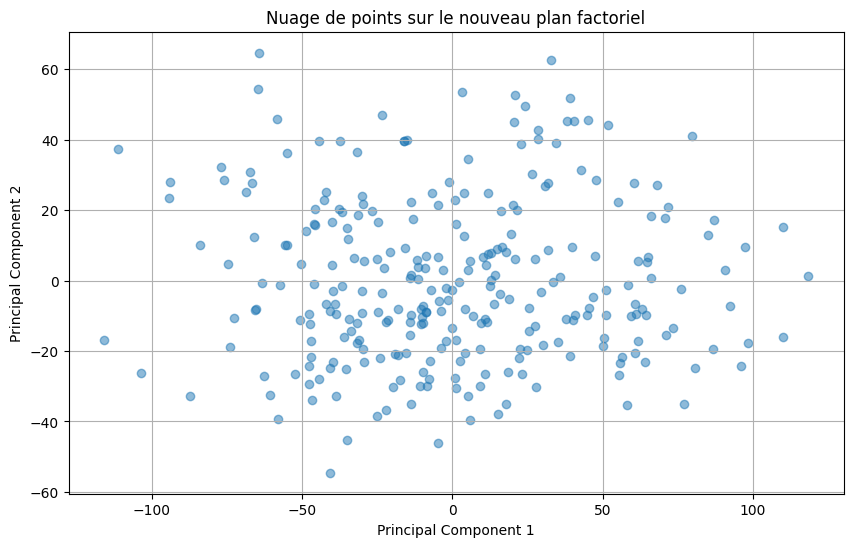

In [18]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Lire les données à partir du fichier CSV
data = pd.read_csv('/content/bd.csv')

# Sélectionner uniquement les colonnes spécifiées
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
selected_data = data[selected_columns]

# Réaliser l'analyse en composantes principales (PCA)
pca = PCA(n_components=2)  # Sélectionner les deux composantes principales
principal_components = pca.fit_transform(selected_data)

# Créer un DataFrame pour le nouveau plan factoriel
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Afficher le nuage de points sur le nouveau plan factoriel
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Nuage de points sur le nouveau plan factoriel')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


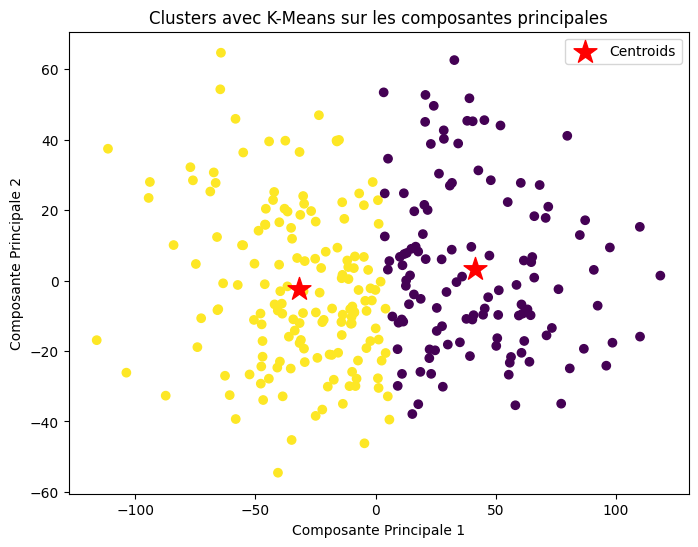

In [19]:
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lire les données à partir du fichier CSV
data = pd.read_csv('/content/bd.csv')

# Sélectionner uniquement les colonnes spécifiées
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
selected_data = data[selected_columns]

# Réaliser l'analyse en composantes principales (PCA)
pca = PCA(n_components=2)  # Sélectionner les deux composantes principales
principal_components = pca.fit_transform(selected_data)

# Créer un DataFrame pour le nouveau plan factoriel
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
# Classification K-Means
kmeans = KMeans(n_clusters=2)  # Choisissez le nombre de clusters désiré
kmeans.fit(principal_df)

# Visualisation des clusters sur le plan des composantes principales
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('Clusters avec K-Means sur les composantes principales')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend()
plt.show()

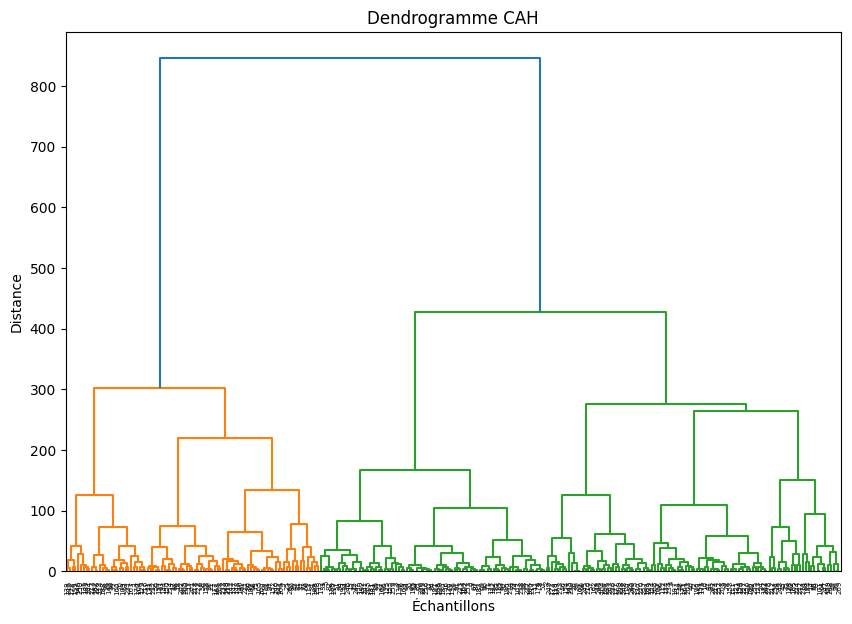

In [20]:

import pandas as pd

from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt

# Lire les données à partir du fichier CSV
data = pd.read_csv('/content/bd.csv')

# Sélectionner uniquement les colonnes spécifiées
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
selected_data = data[selected_columns]

# Réaliser l'analyse en composantes principales (PCA)
pca = PCA(n_components=2)  # Sélectionner les deux composantes principales
principal_components = pca.fit_transform(selected_data)

# Créer un DataFrame pour le nouveau plan factoriel
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
# Création du dendrogramme
linkage_matrix = linkage(principal_df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogramme CAH')
plt.xlabel('Échantillons')
plt.ylabel('Distance')
plt.show()



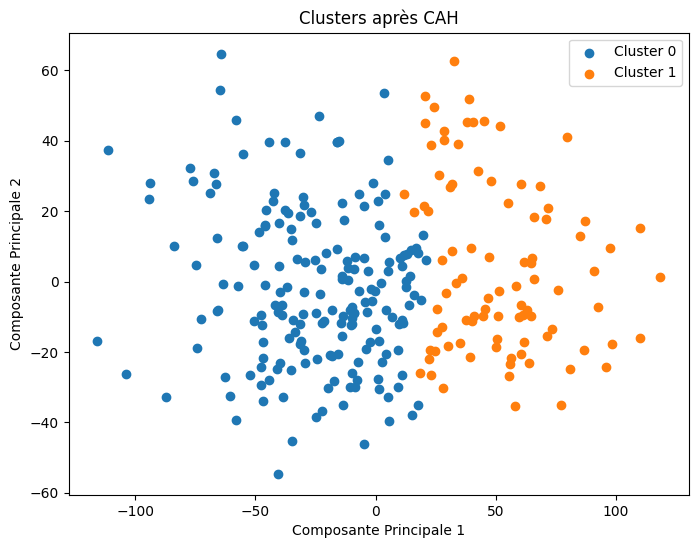

In [21]:
# Choix du nombre de clusters en coupant le dendrogramme
num_clusters = 2  # Choisissez le nombre de clusters
clusters = cut_tree(linkage_matrix, n_clusters=num_clusters)

# Visualisation des clusters
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    plt.scatter(principal_df.loc[clusters.flatten() == cluster, 'Principal Component 1'],
                principal_df.loc[clusters.flatten() == cluster, 'Principal Component 2'],
                label=f'Cluster {cluster}')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Clusters après CAH')
plt.legend()
plt.show()